sergazy.nurbavliyev@gmail.com © 2021

## fair coins and double head coin

Question: A jar has 1000 coins, of which 999 are fair and 1 is double headed. Pick a coin at random, and toss it 10 times. Given that you see 10 heads, what is the probability that the next toss of that coin is also a heads?

## Answer

Let us understand what the question is. We need to find probability of the toss that shows head given it showed 10 heads already. We will write this with mathematical term  as $\mathbb{P}(H\mid 10 H)$, here $H$ means head and also $T$ would mean tail. By using law of total probability we can write this
\begin{equation}
\mathbb{P}(H | 10H) = \mathbb{P}(H | U) * \mathbb{P}(U | 10H) + \mathbb{P}(H | F) * \mathbb{P}(F | 10H)
\end{equation}
Here $U$ represents unfair coin which is double headed and $F$ shows fair coin. Now let us try to calculate each of these probabilities in equation (1).

$\mathbb{P}(H | U)=1$ (because it is unfair coin)

 $\mathbb{P}(H | F)=\frac{1}{2}$ (because it is fair coin)

Now, for other two probability terms we will use definition of conditional probabilities.

\begin{equation}
\mathbb{P}(U | 10H) =\dfrac{ \mathbb{P}(U,10H)}{\mathbb{P}(10H)}=\dfrac{ \mathbb{P}(10H,U)}{\mathbb{P}(10H)}=  \dfrac{ \mathbb{P}(10H | U) * \mathbb{P}(U)}{\mathbb{P}(10H)}
\end{equation}

\begin{equation}
\mathbb{P}(F | 10H) =\dfrac{ \mathbb{P}(F,10H)}{\mathbb{P}(10H)}=\dfrac{ \mathbb{P}(10H,F)}{\mathbb{P}(10H)}=  \dfrac{ \mathbb{P}(10H | F) * \mathbb{P}(F)}{\mathbb{P}(10H)}
\end{equation}
Now to calculate the equation (1), we need to calculate the equation (2) and (3). Let us first calculate the numerator of equation (2), then numerator of equation (3).

$\mathbb{P}(10H | U)=1$

$\mathbb{P}(U)=\frac{1}{1000}$

$\mathbb{P}(10H | F)=\frac{1}{2^{10}}$

$\mathbb{P}(F)=\frac{999}{1000}$

Now the last thing we need to calculate is the denominator of both equation (2) and (3). For that term we again use the law of total probability. 
\begin{equation*}
\mathbb{P}(10H)  = \mathbb{P}(10H | U) * \mathbb{P}(U) + \mathbb{P}(10H | F) * \mathbb{P}(F)=1*\frac{1}{1000}+\frac{999}{1000}*\frac{1}{2^{10}}
\end{equation*}
So equation (2) becomes

\begin{equation*}
\mathbb{P}(U | 10H)=\dfrac{1*\frac{1}{1000}}{1*\frac{1}{1000}+\frac{999}{1000}*\frac{1}{2^{10}}}
\end{equation*}
and equation (3) becomes

\begin{equation*}
\mathbb{P}(F | 10H)=\dfrac{\frac{999}{1000}*\frac{1}{2}}{1*\frac{1}{1000}+\frac{999}{1000}*\frac{1}{2^{10}}}
\end{equation*}

In [1]:
equ_2 = (1/1000)/(1/1000 + (1/2)**10 * 999/1000)
equ_2

0.5061789421651013

In [2]:
equ_3 = ((1/2)**10 * 999/1000)/(1/1000 + (1/2)**10 * 999/1000)
equ_3

0.49382105783489866

In [3]:
#our result that is equation 1
equ_1=1*equ_2+1/2*equ_3
equ_1

0.7530894710825506

## Python code for simulation

In [4]:
coins = ["F", "U"]
outcomes = ["H", "T"]  
numerator = 0
denominator = 0

In [5]:
import random
def simulator(n):
    random.seed(42)
    numerator=0
    denominator=0
    for i in range(n):
        #pick a coin randomly
        rand_int = random.randint(1,1000)
        # assume the double sided coin is the first one 
        if rand_int == 1:
            coin= coins[1]
        else:
            coin = coins[0]
        
        heads = True   # this is always the case for "U" unfair coin
        #print(coin)
        if coin == "F":
            k=0
            while k<10:
                #print(k)
                if random.choice(outcomes) == "T":
                    heads = False
                    break
                k+=1
        if heads==True:
            denominator += 1
            #for the last toss
            if coin == "U" or (coin == "F" and random.choice(outcomes) == "H"):
                numerator += 1
    prob = numerator / denominator
    return prob,numerator,denominator

In [8]:
simulator(10000)

(0.6, 12, 20)

In [9]:
simulator(100000)

(0.7, 140, 200)

In [10]:
simulator(1000000)

(0.7442094662638469, 1478, 1986)

In [11]:
trial_list= [simulator(i)[0] for i in range(10000,5000001,10000)]

In [12]:
#trial_list

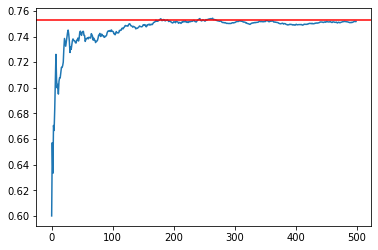

In [13]:
from matplotlib import pyplot as plt
plt.plot(trial_list)
plt.axhline(y=0.7530894710825506, color='r', linestyle='-')
plt.show()


For further discussions:
https://www.quora.com/A-jar-has-1000-coins-of-which-999-are-fair-and-1-is-double-headed-Pick-a-coin-at-random-and-toss-it-10-times-Given-that-you-see-10-heads-what-is-the-probability-that-the-next-toss-of-that-coin-is-also-a-heads